# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Alexa Andivi Calderón Sánchez

- ID: A01637520

- My carreer: Ingenieria Industrial y de Sistemas


# Importing libraries

In [2]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Import sklearn KMeans
from sklearn.cluster import KMeans


# PART 1
# Use your assigned dataset

## A1 Load data

In [3]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = ""


Mounted at /content/drive


In [4]:
# Dataset url
url = Ruta + "A01637520.csv"

# Load the dataset
df  = pd.read_csv(url)


## A2 Data managment


Print the first 7 rows

In [5]:
df.head(7)

,Unnamed: 0,x1,x2
0,0,-0.363208,-0.291055
1,1,0.286659,-0.307305
2,2,-1.048346,-0.093228
3,3,-0.339257,0.237066
4,4,-0.195347,0.455069
5,5,0.427124,0.026370
6,6,0.091660,0.318124


Print the first 4 last rows

In [6]:
df.tail(4)

,Unnamed: 0,x1,x2
1246,1246,-0.109344,-0.382886
1247,1247,0.540459,-0.789590
1248,1248,-0.011525,0.436095
1249,1249,0.370056,0.085859


How many rows and columns are in your data?

Use the `shape` method


In [7]:
fila = df.shape[0]
columna = df.shape[1]

print("Nuestra base de datos cuenta con un total de ", fila, "filas y ", columna, "columnas.")

Nuestra base de datos cuenta con un total de  1250 filas y  3 columnas.


Print the name of all columns 

Use the `columns` method

In [8]:
c1 = df.columns[0]
c2 = df.columns[1]
c3 = df.columns[2]

print("El nombre de nuestras columnas es", c1, ",", c2,"y",c3)

El nombre de nuestras columnas es Unnamed: 0 , x1 y x2


What is the data type in each column

Use the `dtypes` method 

In [9]:
n1 = df.dtypes[0]
n2 = df.dtypes[1]
n3 = df.dtypes[2]

print("El tipo de datos de nuestra variable", c1, " es ", n1)
print ("El tipo de datos de nuestra variable", c2,"es ", n2)
print ("El tipo de datos de nuestra variable", c3, "es", n3)

El tipo de datos de nuestra variable Unnamed: 0  es  int64
El tipo de datos de nuestra variable x1 es  float64
El tipo de datos de nuestra variable x2 es float64


What is the meaning of rows and columns?

In [10]:
# Your responses here

# 1) La variable "Unnamed: 0 muetra un dato entero que corresponde al número de observación que registra la base de datos."

# 2) La variable "x1" muestra un dato númerico con decimales y reales siendo positivos o negativos

# 3) La variable "x2" muestra un dato númerico con decimales y reales siendo positivos o negativos


Print a statistical summary of your columns


In [11]:
df.describe()

,Unnamed: 0,x1,x2
count,1250.000000,1250.000000,1250.000000
mean,624.500000,-0.001559,0.000326
std,360.988227,0.541956,0.538354
min,0.000000,-1.107301,-1.144790
25%,312.250000,-0.363571,-0.371210
50%,624.500000,0.000697,0.000358
75%,936.750000,0.361785,0.369657
max,1249.000000,1.114984,1.082177


In [12]:
# 1) What is the minumum and maximum values of each variable
# La variable "Unnamed: 0" posee un minimo valor de 0 mientras que su valor máximo es 1249, como el número total de los datos.
# La variable de "x1" tiene un valor minimo de -1.1073 mientras que su valor máximo es de 1.1149.
# La variable de "x2" tiene un valor minimo de -1.1447 mientras que su valor máximo es de 1.0821.

# 2) What is the mean and standar deviation of each variable
# La variable "Unnamed: 0" es una variable que identifica la observación por lo tanto su promedio es de 624.5 
# mientras que su desviación estandar es de 360.98.
# Las variables con el prefijo x muestran que su promedio es cercano a 0 siendo -0.0015 el de x1 y 0.0003 el de x2
# mientras que la desviación estandar esta cercana a 0.5 siendo 0.5419 para x1 y 0.5383 para x2

# 3) What the 25%, 50% and 75% represent?
# Los procentajes son los quiartiles en los que se divide nuestra base de datos. Podemos observar que el 25% nuestros datos en las variables con prefijo X
# se encuentran hasta el valor de -0.3635. El 50% presenta sus datos cercanos al 0 por parte de x1 el valor es de 0.0006 que se encuentra 
# alejada de su media, sin embargo para x2 es cercano a su media con un valor de 0.0003, para fibalizar en ambos casos el 75% llega hasta el .36



Rename the columns using the same name with capital letters

In [13]:
df = df.rename(columns=str.upper)
df.head(3)

,UNNAMED: 0,X1,X2
0,0,-0.363208,-0.291055
1,1,0.286659,-0.307305
2,2,-1.048346,-0.093228


Rename the columns to their original names

In [14]:
df = df.rename(columns=str.lower)
df.head(3)

,unnamed: 0,x1,x2
0,0,-0.363208,-0.291055
1,1,0.286659,-0.307305
2,2,-1.048346,-0.093228


Use two different alternatives to get one of the columns

In [15]:
dfx1 = df.loc[:,["x1"]]
dfx1.head(3)

,x1
0,-0.363208
1,0.286659
2,-1.048346


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [16]:
df1 = df.loc[62:72,["x1","x2"]]
df1

,x1,x2
62,-0.053239,-0.980630
63,0.963116,-0.036657
64,0.867211,0.492118
65,-0.373927,0.111638
66,-0.902518,0.499599
67,0.279935,0.127251
68,-0.417193,0.172715
69,-0.094738,0.382842
70,-0.199319,1.073075
71,0.954610,-0.377335


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [17]:
df2 = df.loc[:,["x1","x2"]]
Nan = df2.notnull().sum()
print("El total de observaciones que se tiene es de 1250, la siguiente tabla muestra el total de observaciones por variable x1 & x2")
Nan

El total de observaciones que se tiene es de 1250, la siguiente tabla muestra el total de observaciones por variable x1 & x2


x1    1250
x2    1250
dtype: int64

Discard the last column


In [18]:
df3 = df.drop(columns= ["x2"])
df3.head(3)

,unnamed: 0,x1
0,0,-0.363208
1,1,0.286659
2,2,-1.048346


### Questions 

Based on the previos results, provide a description of yout dataset

Your response:

> La base de datos que se me otrogo cunata con un total de 1250 observaciones, donde la primer columna de estos es el número de observación que se tiene mientras que las siguientes columnas muestran un conjunto de datos que oscilan entre -1.15 y 1.15.

> En el caso de x2 se tiene que su promedio esta cercano a la quartil equivalente al 50%, mientras que para x1 el promedio y el 50% se encuentran alejados.

>Algo importante a mencionar es que nuestra base de datos cuenta con todas sus observaciones por lo que no se debio de hacer una limpieza de datos.




## A3 Data visualization

Plot in the same figure the histogram of the two variables

Text(0.5, 1.0, 'Histograma de los datos x1')

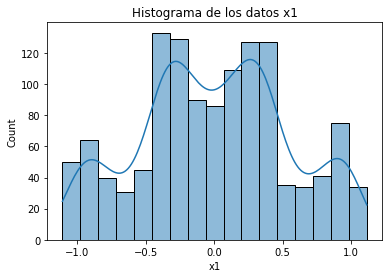

In [19]:
sh = sns.histplot(data=df2,x="x1",kde=True)
sh.set_title("Histograma de los datos x1")

Text(0.5, 1.0, 'Histograma de los datos x2')

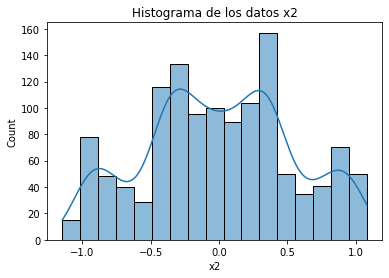

In [20]:
sh1 = sns.histplot(data=df2,x="x2",kde=True)
sh1.set_title("Histograma de los datos x2")

Based on this plots, provide a description of your data:

Your response here:

In [21]:
# La distribución de nuestros datos en ambas variables non muestran una distribución normal, ya que la campana de Gauss no se puede observar de forma 
# clara, si bien suben y baja los datos presentan una irregualirad en su trayectoria teniendo picos a lo largo de la distribución.

Plot in the same figure the boxplot of the two variables 

Text(0.5, 1.0, 'Gráfico de cajas de la base de datos')

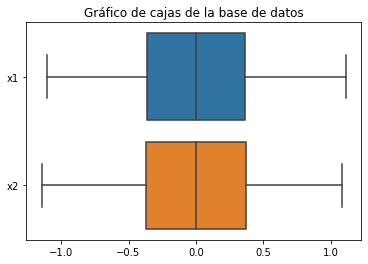

In [22]:
sp = sns.boxplot(data= df2,orient= "h")
sp.set_title("Gráfico de cajas de la base de datos")

Scatter plot of the two variables

Text(0.5, 1.0, 'Gráfica de disperción de los datos')

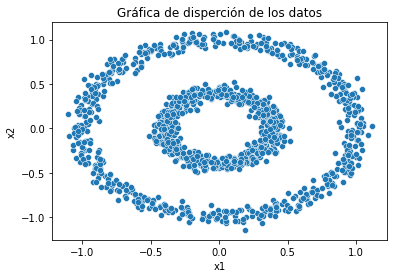

In [23]:
ss = sns.scatterplot(data=df2, x="x1", y="x2")
ss.set_title("Gráfica de disperción de los datos")

### Questions 

Based on the previos plots, provide a description of yout dataset

Your response:
> Los histogramas muestran que nuestras variables no presentan un coportamiento normal.

> El gráfico de caja muestra una similaridad de los datos, ya que estos visualmente tienen las cajas muy similares, x2 muestra un ligero desplazamiento a la izquierda mostrando que sus datos tienen un minimo más grande y un máximo más pequeños.

> El gráfico de disperción muestra que los datos no presentan un comoprtamiento normal y que la gráfica presenta una visualización de dona.

## A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

In [24]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
#Let's assume there are 2,3,4,5...? clusters/groups
K  = 2

#Creat the Kmeans box
km = KMeans(n_clusters = K, n_init='auto')

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(df2)


# Print estimated cluster of each point in the dataset
yestimated

array([0, 1, 0, ..., 1, 1, 1], dtype=int32)

Add to your dataset a column with the assihned cluster to each data point

In [25]:
df2['yestimated'] = yestimated
df2.head(3)

,x1,x2,yestimated
0,-0.363208,-0.291055,0
1,0.286659,-0.307305,1
2,-1.048346,-0.093228,0


Print the number associated to each cluster

In [26]:
df2.groupby(['yestimated']).size()

yestimated
0    612
1    638
dtype: int64

Print the centroids

In [27]:
ClustersC = km.cluster_centers_
Cc = pd.DataFrame(ClustersC,columns = ["Gx1", "Gx2"])
Cc

,Gx1,Gx2
0,-0.435408,-0.137151
1,0.415945,0.132623


Print the intertia metric

In [28]:
km.inertia_

479.6807380579394

Plot a scatter plot of your data assigned to each cluster. Also plot the centroids

Text(0.5, 1.0, 'Gráfico de Dispersión con Agrupación')

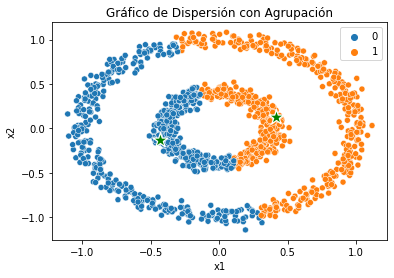

In [29]:
ss1 = sns.scatterplot(data= df2 , x="x1", y="x2", hue="yestimated")
ss2 = sns.scatterplot(data= Cc , x="Gx1", y="Gx2", color="green", s=250, marker ="*")

ss2.set_title("Gráfico de Dispersión con Agrupación")

### Questions 

Provides a detailed description of your results

Your response:
> Se seleccionaron dos agrupaciones para los datos, la división de estos por grupo fue casi la mitad siendo 612 de los 1250 datos en el grupo 0 mientras que el grupo 1 tiene 638 de los 1250. De forma de vizual se observa que la mitad de la dona es de un color azul mostrando su afilación al grupo 0 mientras que la sección narnaja es de los grupo 1.
 
> Los centros de los centroides se muestran cercanos a nuestra coordena (0,0) que se vizualiza como el centro del gráfico.

## A5 Elbow plot

Compute the Elbow plot

In [30]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng= range(1,20)

# For each k
for k in k_rng:
  km = KMeans(n_clusters=k,n_init="auto")
  km.fit_predict(df2[["x1","x2"]])
  sse.append(km.inertia_)

#Base de datos para el elbow
ng= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19] 
sse1 = pd.DataFrame({'Grupos': ng, 'sse':sse})
sse1

,Grupos,sse
0,1,728.843212
1,2,478.391198
2,3,309.262431
3,4,231.522021
4,5,205.291235
5,6,165.800293
6,7,137.439182
7,8,112.925713
8,9,88.854067
9,10,75.714381


Text(0.5, 1.0, 'Elbow Plot')

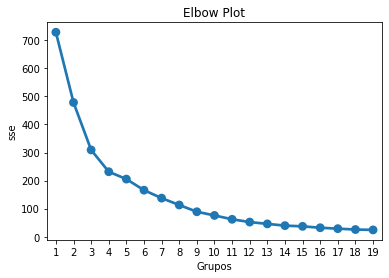

In [31]:
ss3 = sns.pointplot(data= sse1, x="Grupos", y="sse")
ss3.set_title("Elbow Plot")

### Questions 

What is the best number of clusters K? (argue your response)

Your response:
 >Si bien apartir de cuatro clusters el gráfico muestra que su sse muestra una reducción significativa, hasta la generación de trece agrpaciones muestra un sse menor. Sin embargo el objetivo de cluster generar agrupaciones de datos en base a sus caracteristicas en el plano por lo que el tener 4 agrupaciones podria ser funcional en nuestra base de datos.

Does this number of clusters agree with your inital guess? (argue your response)

Your response:
> Mi respuesta inicial fue de 2, por el hecho de que la forma de la gráfica presentaba formas circulares y eseperaba que la gráfica mostrará los grupos divididos por mitas, sin embrago existiran datos que presenten una distancia significativa, por lo que la conclusión obtenida del gráfico elbow sería la más adecuada.

# PART 2
# Load and do clustering using the "digits" dataset

1) Load the dataset using the "load_digits()" function from "sklearn.datasets"


In [32]:
# Import the dataset
from sklearn.datasets import load_digits

# Load the dataset
DS = load_digits()

# Print keys
DS.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

2) Plot some of the observations

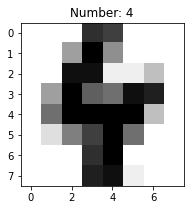

In [33]:
# Select one of the observations
i = 270

# Show the data vector of the selected observation
DS.data[i]

# Show the data matrix of the selected observation
DS.images[i]

# Show the number of the selected observation 
DS.target[i]

# Display the observation
plt.figure(1, figsize=(3, 3))
plt.imshow(DS.images[i], cmap=plt.cm.gray_r)
plt.title('Number: ' + str(DS.target[i]) )
plt.show()

In [67]:
# Convert to a pandas dataframe
dfP2 = pd.DataFrame(np.column_stack([DS['data']]) , columns=DS['feature_names'])

# Print the dataset
dfP2.head(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


In [35]:
fila = dfP2.shape[0]
columna = dfP2.shape[1]

print("Nuestra base de datos cuenta con un total de ", fila, "filas y ", columna, "columnas.")

Nuestra base de datos cuenta con un total de  1797 filas y  64 columnas.


In [40]:
dfP2.columns

Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7'],
      dtype='object')

In [75]:
dfP2.dtypes

pixel_0_0    float64
pixel_0_1    float64
pixel_0_2    float64
pixel_0_3    float64
pixel_0_4    float64
              ...   
pixel_7_3    float64
pixel_7_4    float64
pixel_7_5    float64
pixel_7_6    float64
pixel_7_7    float64
Length: 64, dtype: object

In [57]:
dfP21 = dfP2.loc[:,["pixel_0_0","pixel_0_1","pixel_0_2","pixel_0_3","pixel_0_4","pixel_0_5","pixel_0_6","pixel_0_7"]]
dfP21.head(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0


Text(0.5, 1.0, 'Gráfico de cajas de una extracción de las primeras 6 columnas de la base de datos')

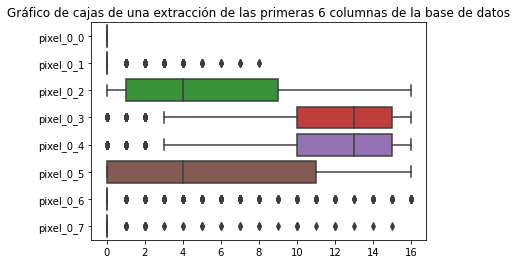

In [58]:
sp1 = sns.boxplot(data= dfP21,orient= "h")
sp1.set_title("Gráfico de cajas de una extracción de las primeras 6 columnas de la base de datos")

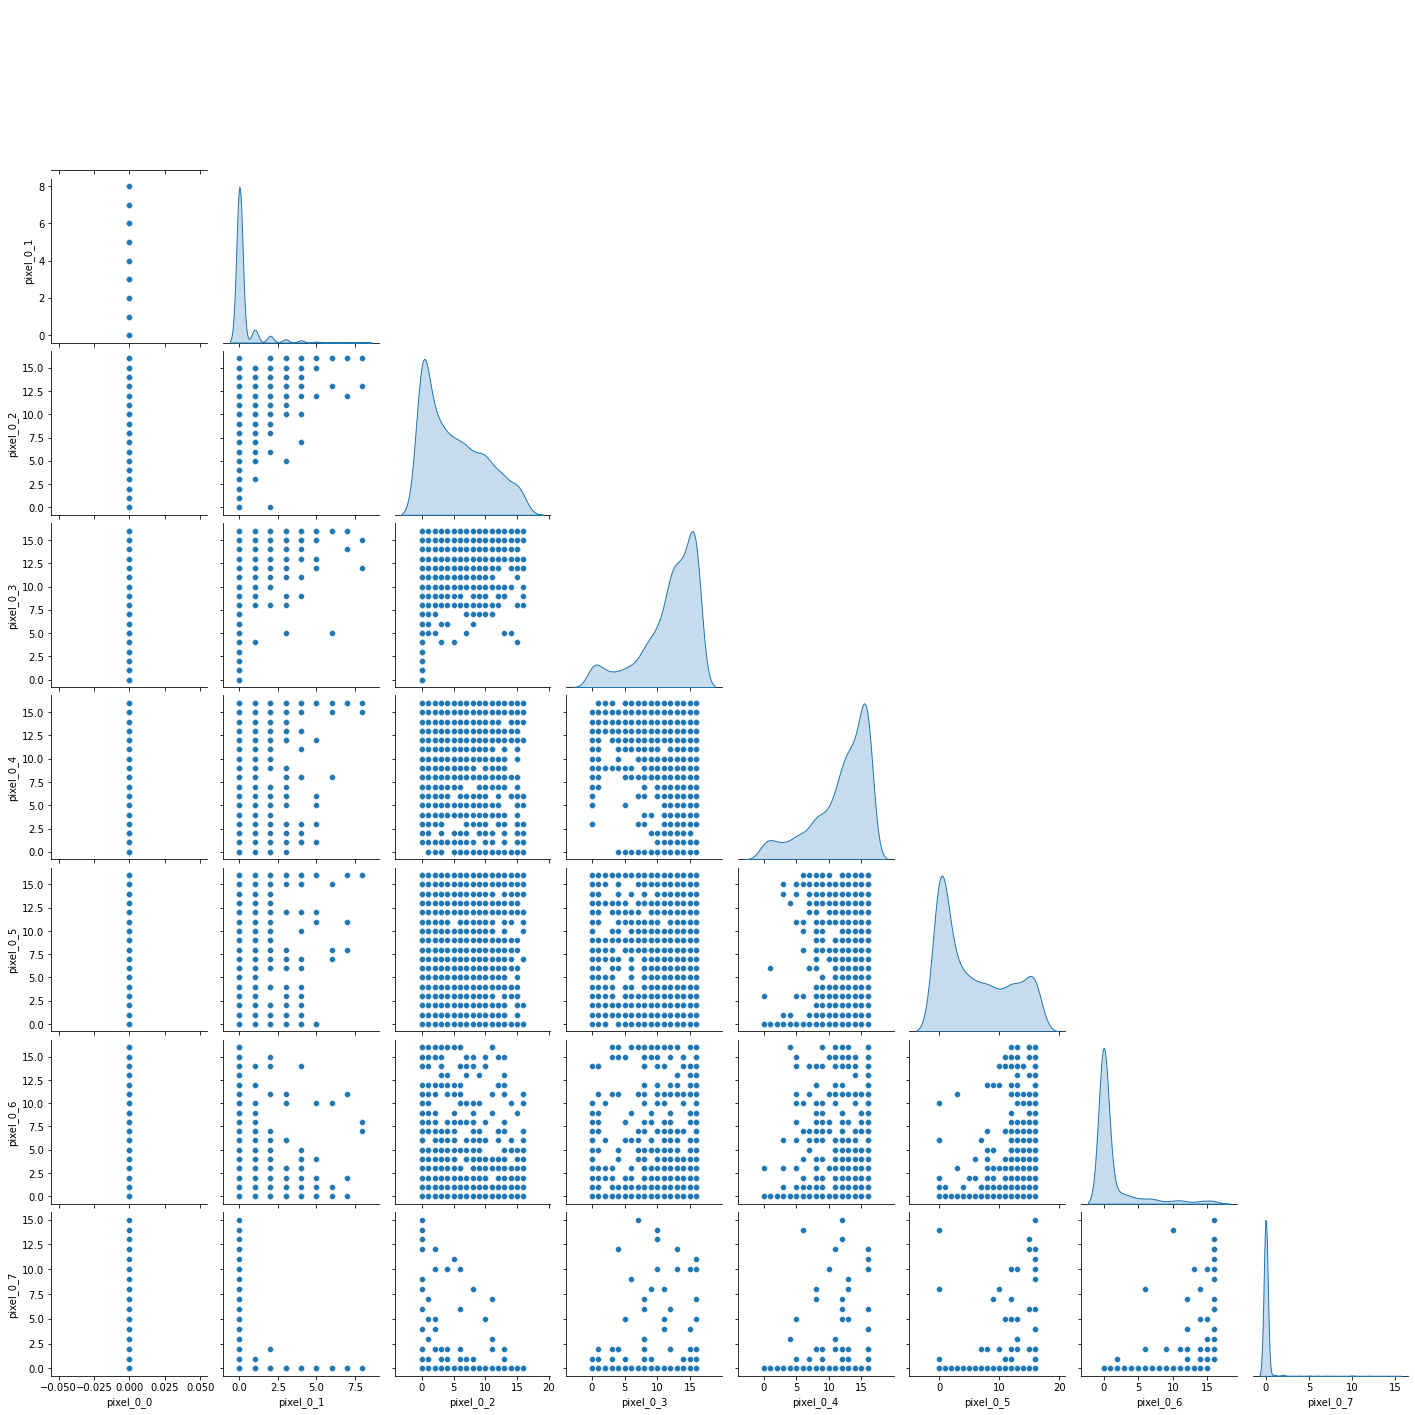

In [59]:
sp2= sns.pairplot(data= dfP21, diag_kind="kde",corner=True)

3) Do K means clustering 

In [50]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
#Let's assume there are 2,3,4,5...? clusters/groups
K  = 7

#Creat the Kmeans box
km = KMeans(n_clusters = K, n_init='auto')

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated1 = km.fit_predict(dfP2)


# Print estimated cluster of each point in the dataset
yestimated1

array([4, 2, 2, ..., 2, 3, 3], dtype=int32)

In [51]:
dfP2['yestimated'] = yestimated1
dfP2.head(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,yestimated
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,4
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,2
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2


In [52]:
dfP2.groupby(['yestimated']).size()

yestimated
0    187
1    240
2    338
3    462
4    179
5    212
6    179
dtype: int64

In [53]:
km.inertia_

1336436.1380961337

In [60]:
dfP22 = dfP2.loc[:,["pixel_0_0","pixel_0_1","pixel_0_2","pixel_0_3","pixel_0_4","pixel_0_5","pixel_0_6","pixel_0_7","yestimated"]]
dfP22.head(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,yestimated
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,4
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,2
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,2


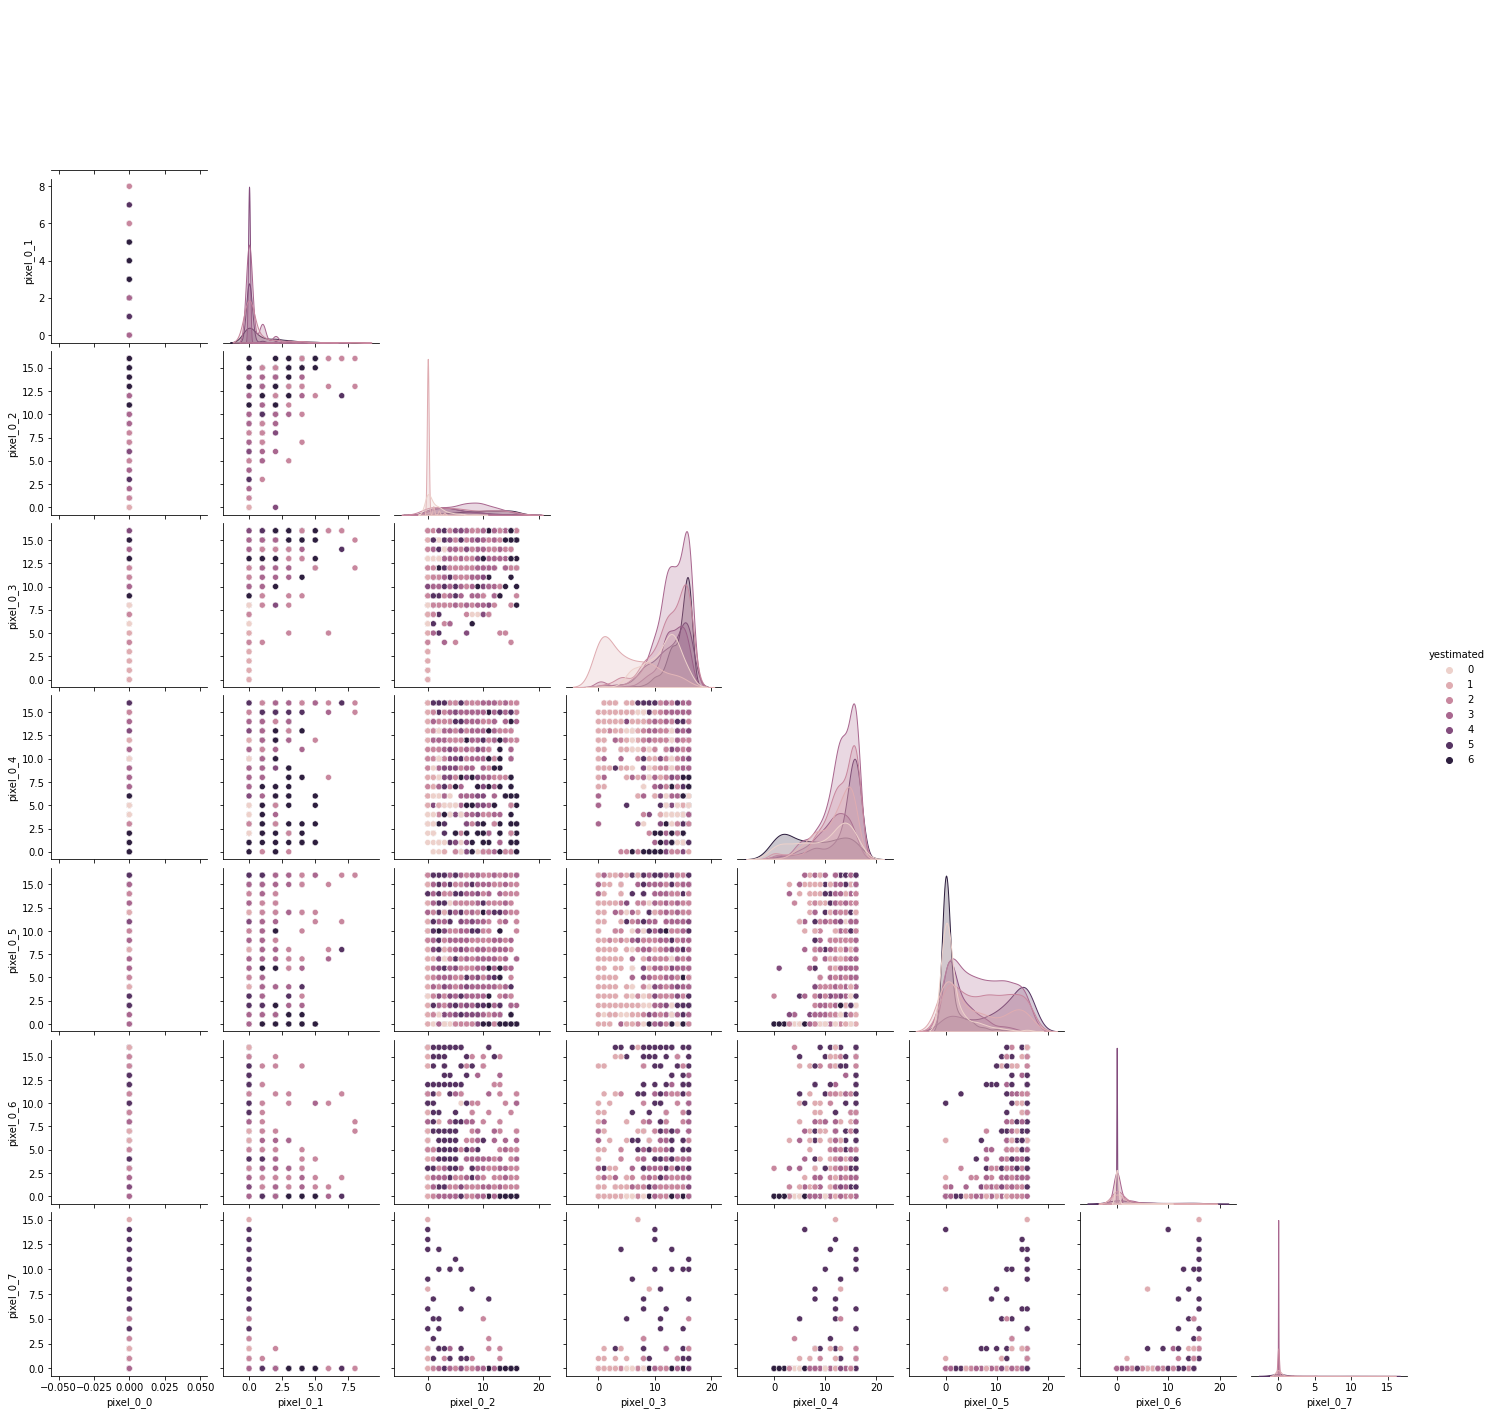

In [77]:
sp2= sns.pairplot(data= dfP22, diag_kind="kde",corner=True, hue= "yestimated")

4) Verify your results in any of the observations

In [74]:
# Intialize a list to hold sum of squared error (sse)
sse2 = []

# Define values of k
k_rng= range(1,12)

# For each k
for k in k_rng:
  km = KMeans(n_clusters=k,n_init="auto")
  km.fit_predict(dfP23)
  sse2.append(km.inertia_)

#Base de datos para el elbow
ng= [1,2,3,4,5,6,7,8,9,10,11] 
sse3 = pd.DataFrame({'Grupos': ng, 'sse':sse2})
sse3

,Grupos,sse
0,1,2.159057e+06
1,2,1.928523e+06
2,3,1.730762e+06
3,4,1.621633e+06
4,5,1.528914e+06
5,6,1.416836e+06
6,7,1.339212e+06
7,8,1.270113e+06
8,9,1.223667e+06
9,10,1.253135e+06


Text(0.5, 1.0, 'Elbow Plot')

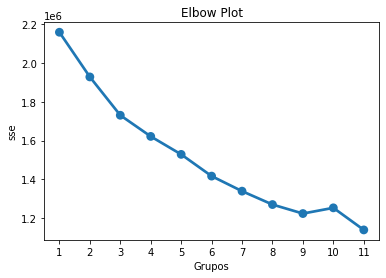

In [76]:
ss3 = sns.pointplot(data= sse3, x="Grupos", y="sse")
ss3.set_title("Elbow Plot")

### Questions 

Provides a detailed description of your results.

Your response:
> La base de datos extraida se represneta como una imagen de números pixeleados. Al convertirlos en un Data Frame obtenemos una base de datos de 64 variables y un total de 1797 observación, los datos al ser gráficados presentan una serie de datos atipicos en los gráficos bloxplot sin embargo, al ser datos transformados y por su naturaleza de ser pixeles no se considedarían como unos datos atipicos.

> Los datos en el gráfico pair muestran una cierta polaridad y concentración en un conjunto númerico, aparte de que en sus scatterplots no muestran una agrupación clara en los datos que se mostraron en pantanlla.

> Se tomon una primera agupación de 7 por el hecho de que las variables se tienen un sufijo hasta el número 7, sin embargo al anexar la variable de la "yestimated" y realizar las mis gráficas de pair plot se nota que la agrupación no muestra como una concordancia en los grupos, al realizar el gráfico de elbow se muestra que realizar un total de 7 grupos muestra una disminución en la curva considerable. Al tener más de 8 grupos el tamaño del sse no disminuye de forma significativa que con 7 grupos, aparte se muestra que la creación de 10 grupos serían un retroceso en la reducción sse.



# PART 3
# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia 

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:

> La interpretación de los datos e identificación de variables relevantes concidero que es relevante en mi carrera, es una parte que constantemente se pone en practica en los proyectos realizados, por lo tanto considero que es una competencia que ya he desarrollado.

> Podría prfundizar el uso de herramientas de programación para el análisis de datos, ya que sus capacidades en correr base de datos pesadas es más complejo.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:
> Considero que la contrucción de modelos es una competencia que puedo desarrollar con mayor profundidad, hablando en terminos de programación, ya que considero que puedo desarrollar este tipo de modelos en otros porgramas como excel o minitab.